In [1]:
import os

print(os.listdir("data")[:10])

['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy']


In [2]:
import os
import shutil
source_dir = 'data'
target_dir = 'data_clean'
os.makedirs(target_dir, exist_ok=True)
keywords = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
for kw in keywords:
    src = os.path.join(source_dir, kw)
    dst = os.path.join(target_dir, kw)
    
    if os.path.exists(src):
        shutil.copytree(src, dst)
        print(f"Copied: {kw}")
    else:
        print(f"WARNING: '{kw}' not found in source directory!")

Copied: yes
Copied: no
Copied: up
Copied: down
Copied: left
Copied: right
Copied: on
Copied: off
Copied: stop
Copied: go


In [3]:
print(os.listdir("data_clean")[:10])

['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']


In [4]:
!pip install librosa soundfile numpy matplotlib

  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached soundfile-0.13.1-py2.py3-none-win_amd64.whl.metadata (16 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached soxr-0.5.0.post1-cp312-abi3-win_amd64.whl.metadata (5.6 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
Using cached librosa-0.11.0-py3-none-any.whl (260 kB)
Using cached soundfile-0.13.1-py2.py3-none-win_amd64.whl (1.0 MB)
Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.8 MB 1.5 MB/s eta 0:00:02
   ------------------ --------------------- 1.3/2.8 MB 2.3 MB/s eta 0:00:01
   -

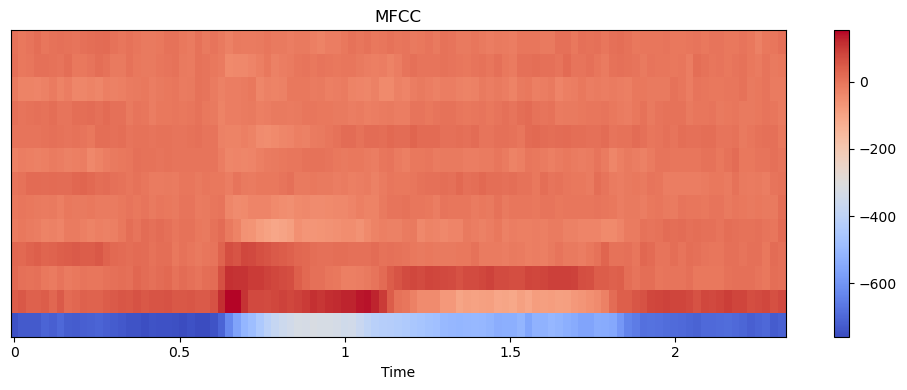

In [5]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os

# Loads a sample file
file_path = 'data_clean/yes/0a7c2a8d_nohash_0.wav'  
y, sr = librosa.load(file_path, sr=16000)  # force sample rate to 16kHz

# Convert window size from ms to samples
def ms_to_samples(ms, sr=16000):
    return int((ms / 1000) * sr)

win_length = ms_to_samples(25)
hop_length = ms_to_samples(10)

# Extract MFCCs
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft=512,
                            hop_length=hop_length, win_length=win_length)

# Display the MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


In [10]:

def extract_mfcc_features(y, sr, win_ms, overlap):
    win_length = ms_to_samples(win_ms, sr)          # e.g. 25ms → 400 samples
    hop_length = max(1, int(win_length * (1 - overlap)))  # ensure ≥1
    n_fft = 2 ** (win_length - 1).bit_length()       # next power of 2 for n_fft ≥ win_length

    if win_length > n_fft:
        raise ValueError(f"Window length {win_length} exceeds n_fft {n_fft}")

    mfcc = librosa.feature.mfcc(
        y=y,
        sr=sr,
        n_mfcc=13,
        n_fft=n_fft,
        hop_length=hop_length,
        win_length=win_length
    )
    return mfcc
window_lengths_ms = list(range(10, 101, 10))  # 10ms to 100ms
overlap_percents = [0.0, 0.25, 0.5, 0.75]

for win_ms in window_lengths_ms:
    for overlap in overlap_percents:
        try:
            mfcc = extract_mfcc_features(y, sr, win_ms, overlap)
            print(f"Window: {win_ms} ms, Overlap: {int(overlap*100)}%, MFCC shape: {mfcc.shape}")
        except Exception as e:
            print(f"Window: {win_ms} ms, Overlap: {int(overlap*100)}% → Error: {e}")


Window: 10 ms, Overlap: 0%, MFCC shape: (13, 101)
Window: 10 ms, Overlap: 25%, MFCC shape: (13, 134)
Window: 10 ms, Overlap: 50%, MFCC shape: (13, 201)
Window: 10 ms, Overlap: 75%, MFCC shape: (13, 401)
Window: 20 ms, Overlap: 0%, MFCC shape: (13, 51)
Window: 20 ms, Overlap: 25%, MFCC shape: (13, 67)
Window: 20 ms, Overlap: 50%, MFCC shape: (13, 101)
Window: 20 ms, Overlap: 75%, MFCC shape: (13, 201)
Window: 30 ms, Overlap: 0%, MFCC shape: (13, 34)
Window: 30 ms, Overlap: 25%, MFCC shape: (13, 45)
Window: 30 ms, Overlap: 50%, MFCC shape: (13, 67)
Window: 30 ms, Overlap: 75%, MFCC shape: (13, 134)
Window: 40 ms, Overlap: 0%, MFCC shape: (13, 26)
Window: 40 ms, Overlap: 25%, MFCC shape: (13, 34)
Window: 40 ms, Overlap: 50%, MFCC shape: (13, 51)
Window: 40 ms, Overlap: 75%, MFCC shape: (13, 101)
Window: 50 ms, Overlap: 0%, MFCC shape: (13, 21)
Window: 50 ms, Overlap: 25%, MFCC shape: (13, 27)
Window: 50 ms, Overlap: 50%, MFCC shape: (13, 41)
Window: 50 ms, Overlap: 75%, MFCC shape: (13, 8

In [11]:
import os
import numpy as np
import librosa
from tqdm import tqdm

# Parameters
input_dir = "data_clean"
output_base = "features_mfcc"
window_lengths_ms = list(range(10, 101, 10))
overlap_percents = [0.0, 0.25, 0.5, 0.75]
sr = 16000  # sample rate

def ms_to_samples(ms, sr=16000):
    return int((ms / 1000) * sr)

def extract_mfcc(y, sr, win_ms, overlap):
    win_length = ms_to_samples(win_ms, sr)
    hop_length = max(1, int(win_length * (1 - overlap)))
    n_fft = 2 ** (win_length - 1).bit_length()
    if win_length > n_fft:
        raise ValueError(f"Window length {win_length} > n_fft {n_fft}")
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13,
                                n_fft=n_fft, hop_length=hop_length,
                                win_length=win_length)
    return mfcc

# Loop through all configs and files
for win_ms in window_lengths_ms:
    for overlap in overlap_percents:
        print(f"Processing win={win_ms}ms, overlap={int(overlap*100)}%")
        output_dir = f"{output_base}/win_{win_ms}/overlap_{int(overlap*100)}"
        os.makedirs(output_dir, exist_ok=True)

        for label in os.listdir(input_dir):
            label_path = os.path.join(input_dir, label)
            if not os.path.isdir(label_path):
                continue

            out_label_path = os.path.join(output_dir, label)
            os.makedirs(out_label_path, exist_ok=True)

            for i, file in enumerate(tqdm(os.listdir(label_path), desc=f"  {label}")):
                if file.endswith('.wav'):
                    file_path = os.path.join(label_path, file)
                    y, _ = librosa.load(file_path, sr=sr)
                    try:
                        mfcc = extract_mfcc(y, sr, win_ms, overlap)
                        out_file = os.path.join(out_label_path, f"{i:05}.npy")
                        np.save(out_file, mfcc)
                    except Exception as e:
                        print(f"    Skipped {file}: {e}")


Processing win=10ms, overlap=0%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:32<00:00, 73.02it/s]


Processing win=10ms, overlap=25%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:33<00:00, 71.73it/s]


Processing win=10ms, overlap=50%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:37<00:00, 63.72it/s]


Processing win=10ms, overlap=75%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:42<00:00, 55.28it/s]


Processing win=20ms, overlap=0%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:40<00:00, 58.08it/s]


Processing win=20ms, overlap=25%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:32<00:00, 73.96it/s]


Processing win=20ms, overlap=50%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:34<00:00, 69.59it/s]


Processing win=20ms, overlap=75%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:38<00:00, 61.11it/s]


Processing win=30ms, overlap=0%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:30<00:00, 79.19it/s]


Processing win=30ms, overlap=25%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:32<00:00, 72.75it/s]


Processing win=30ms, overlap=50%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:30<00:00, 77.45it/s]


Processing win=30ms, overlap=75%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:34<00:00, 68.69it/s]


Processing win=40ms, overlap=0%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:32<00:00, 72.95it/s]


Processing win=40ms, overlap=25%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:33<00:00, 71.76it/s]


Processing win=40ms, overlap=50%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:24<00:00, 98.35it/s]


Processing win=40ms, overlap=75%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:29<00:00, 80.39it/s]


Processing win=50ms, overlap=0%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:30<00:00, 79.14it/s]


Processing win=50ms, overlap=25%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:32<00:00, 73.07it/s]


Processing win=50ms, overlap=50%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:33<00:00, 70.97it/s]


Processing win=50ms, overlap=75%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:39<00:00, 60.43it/s]


Processing win=60ms, overlap=0%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:15<00:00, 151.52it/s]


Processing win=60ms, overlap=25%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:16<00:00, 142.94it/s]


Processing win=60ms, overlap=50%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:16<00:00, 141.54it/s]


Processing win=60ms, overlap=75%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:19<00:00, 119.02it/s]


Processing win=70ms, overlap=0%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:20<00:00, 113.71it/s]


Processing win=70ms, overlap=25%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:20<00:00, 118.22it/s]


Processing win=70ms, overlap=50%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:21<00:00, 110.47it/s]


Processing win=70ms, overlap=75%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:23<00:00, 101.55it/s]


Processing win=80ms, overlap=0%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:20<00:00, 117.40it/s]


Processing win=80ms, overlap=25%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:22<00:00, 105.59it/s]


Processing win=80ms, overlap=50%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:25<00:00, 94.48it/s]


Processing win=80ms, overlap=75%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:26<00:00, 89.08it/s]


Processing win=90ms, overlap=0%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:21<00:00, 108.46it/s]


Processing win=90ms, overlap=25%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:22<00:00, 104.45it/s]


Processing win=90ms, overlap=50%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:29<00:00, 81.11it/s]


Processing win=90ms, overlap=75%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:28<00:00, 84.67it/s]


Processing win=100ms, overlap=0%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:22<00:00, 107.73it/s]


Processing win=100ms, overlap=25%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:22<00:00, 107.39it/s]


Processing win=100ms, overlap=50%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:23<00:00, 102.03it/s]


Processing win=100ms, overlap=75%


  yes: 100%|███████████████████████████████████████████████████████████████████████| 2377/2377 [00:27<00:00, 87.11it/s]


In [14]:
import librosa
import numpy as np
import os
from tqdm import tqdm

# Parameters
input_dir = "data_clean"
output_base = "features_mel"
window_lengths_ms = list(range(10, 101, 10))
overlap_percents = [0.0, 0.25, 0.5, 0.75]
sr = 16000
n_mels = 40  # Number of mel bands

def ms_to_samples(ms, sr=16000):
    return int((ms / 1000) * sr)

def extract_mel(y, sr, win_ms, overlap):
    win_length = ms_to_samples(win_ms, sr)
    hop_length = max(1, int(win_length * (1 - overlap)))
    n_fft = 2 ** (win_length - 1).bit_length()

    if win_length > n_fft:
        raise ValueError(f"Window length {win_length} > n_fft {n_fft}")

    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft,
                                         hop_length=hop_length,
                                         win_length=win_length,
                                         n_mels=n_mels)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    return mel_db

# Loop over files and extract mel spectrograms
for win_ms in window_lengths_ms:
    for overlap in overlap_percents:
        print(f"Processing Mel: win={win_ms}ms, overlap={int(overlap*100)}%")
        output_dir = f"{output_base}/win_{win_ms}/overlap_{int(overlap*100)}"
        os.makedirs(output_dir, exist_ok=True)

        for label in os.listdir(input_dir):
            label_path = os.path.join(input_dir, label)
            if not os.path.isdir(label_path):
                continue

            out_label_path = os.path.join(output_dir, label)
            os.makedirs(out_label_path, exist_ok=True)

            for i, file in enumerate(tqdm(os.listdir(label_path), desc=f"  {label}")):
                if file.endswith('.wav'):
                    file_path = os.path.join(label_path, file)
                    y, _ = librosa.load(file_path, sr=sr)
                    try:
                        mel = extract_mel(y, sr, win_ms, overlap)
                        out_file = os.path.join(out_label_path, f"{i:05}.npy")
                        np.save(out_file, mel)
                    except Exception as e:
                        print(f"    Skipped {file}: {e}")

Processing Mel: win=10ms, overlap=0%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:14<00:00, 159.62it/s]


Processing Mel: win=10ms, overlap=25%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:15<00:00, 156.17it/s]


Processing Mel: win=10ms, overlap=50%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:16<00:00, 144.85it/s]


Processing Mel: win=10ms, overlap=75%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:18<00:00, 130.19it/s]


Processing Mel: win=20ms, overlap=0%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:15<00:00, 155.93it/s]


Processing Mel: win=20ms, overlap=25%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:15<00:00, 151.42it/s]


Processing Mel: win=20ms, overlap=50%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:20<00:00, 116.67it/s]


Processing Mel: win=20ms, overlap=75%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:19<00:00, 120.53it/s]


Processing Mel: win=30ms, overlap=0%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:14<00:00, 160.60it/s]


Processing Mel: win=30ms, overlap=25%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:15<00:00, 156.96it/s]


Processing Mel: win=30ms, overlap=50%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:13<00:00, 180.95it/s]


Processing Mel: win=30ms, overlap=75%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:14<00:00, 159.88it/s]


Processing Mel: win=40ms, overlap=0%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:13<00:00, 173.36it/s]


Processing Mel: win=40ms, overlap=25%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:13<00:00, 170.05it/s]


Processing Mel: win=40ms, overlap=50%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:16<00:00, 147.08it/s]


Processing Mel: win=40ms, overlap=75%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:17<00:00, 133.61it/s]


Processing Mel: win=50ms, overlap=0%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:13<00:00, 181.81it/s]


Processing Mel: win=50ms, overlap=25%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:13<00:00, 179.28it/s]


Processing Mel: win=50ms, overlap=50%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:16<00:00, 141.68it/s]


Processing Mel: win=50ms, overlap=75%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:18<00:00, 126.61it/s]


Processing Mel: win=60ms, overlap=0%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:14<00:00, 169.51it/s]


Processing Mel: win=60ms, overlap=25%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:13<00:00, 171.38it/s]


Processing Mel: win=60ms, overlap=50%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:16<00:00, 141.85it/s]


Processing Mel: win=60ms, overlap=75%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:18<00:00, 128.01it/s]


Processing Mel: win=70ms, overlap=0%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:16<00:00, 148.16it/s]


Processing Mel: win=70ms, overlap=25%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:18<00:00, 129.23it/s]


Processing Mel: win=70ms, overlap=50%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:15<00:00, 153.61it/s]


Processing Mel: win=70ms, overlap=75%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:18<00:00, 129.07it/s]


Processing Mel: win=80ms, overlap=0%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:13<00:00, 171.66it/s]


Processing Mel: win=80ms, overlap=25%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:12<00:00, 186.38it/s]


Processing Mel: win=80ms, overlap=50%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:14<00:00, 165.64it/s]


Processing Mel: win=80ms, overlap=75%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:18<00:00, 127.44it/s]


Processing Mel: win=90ms, overlap=0%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:14<00:00, 163.28it/s]


Processing Mel: win=90ms, overlap=25%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:14<00:00, 161.96it/s]


Processing Mel: win=90ms, overlap=50%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:15<00:00, 152.38it/s]


Processing Mel: win=90ms, overlap=75%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:16<00:00, 142.64it/s]


Processing Mel: win=100ms, overlap=0%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:12<00:00, 185.76it/s]


Processing Mel: win=100ms, overlap=25%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:14<00:00, 169.64it/s]


Processing Mel: win=100ms, overlap=50%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:14<00:00, 159.54it/s]


Processing Mel: win=100ms, overlap=75%


  yes: 100%|██████████████████████████████████████████████████████████████████████| 2377/2377 [00:17<00:00, 135.71it/s]
